In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("/content/Influenza_symptom_dataset.csv")

In [ ]:
print(df.head())

  gender   age  headache  irritability  sensorium  somnolence  rigid_neck  \
0   MALE   6.0     False         False      False       False       False   
1   MALE   1.7     False         False      False       False       False   
2   MALE   0.9     False         False      False       False       False   
3   MALE  11.0     False         False      False       False       False   
4   MALE  16.0     False         False      False       False       False   

   diarrhea  dysentery  seizures  ...  dark_urine  hepatomegaly  arthralgia  \
0     False      False     False  ...       False         False       False   
1     False      False     False  ...       False         False       False   
2     False      False     False  ...       False         False       False   
3     False      False     False  ...       False         False       False   
4     False      False     False  ...       False         False       False   

   malaise  myalgia  redness_eyes  discharge_eyes  crusting_ey

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              96 non-null     object 
 1   age                 96 non-null     float64
 2   headache            96 non-null     bool   
 3   irritability        96 non-null     bool   
 4   sensorium           96 non-null     bool   
 5   somnolence          96 non-null     bool   
 6   rigid_neck          96 non-null     bool   
 7   diarrhea            96 non-null     bool   
 8   dysentery           96 non-null     bool   
 9   seizures            96 non-null     bool   
 10  nausea              96 non-null     bool   
 11  vomiting            96 non-null     bool   
 12  abdominal_pain      96 non-null     bool   
 13  fever               96 non-null     bool   
 14  chills              96 non-null     bool   
 15  rigors              96 non-null     bool   
 16  breathless

In [ ]:
df.describe()

,age,result
count,96.000000,96.000000
mean,17.604167,0.177083
std,17.750534,0.383743
min,0.200000,0.000000
25%,4.000000,0.000000
50%,10.000000,0.000000
75%,28.000000,0.000000
max,80.000000,1.000000


In [ ]:
shape=df.shape
shape

(96, 37)

In [ ]:
column_names = ['gender','headache','irritability','sensorium','somnolence','rigid_neck','diarrhea','dysentery','seizures','nausea','vomiting','abdominal_pain','fever','chills','rigors','breathlessness','cough','rhinorrhea','sore_throat','bullae','papular_rash','pustule','macular_rash','maculo_papulo_rash','eschar','jaundice','dark_urine','hepatomegaly','arthralgia','malaise','myalgia','redness_eyes','discharge_eyes','crusting_eyes','swelling _eyes' ]

In [ ]:
le = LabelEncoder()

# iterate over the specified columns
for col in column_names:
    # apply LabelEncoder to the column
    df[col] = le.fit_transform(df[col])

In [ ]:
df.dtypes

gender                  int64
age                   float64
headache                int64
irritability            int64
sensorium               int64
somnolence              int64
rigid_neck              int64
diarrhea                int64
dysentery               int64
seizures                int64
nausea                  int64
vomiting                int64
abdominal_pain          int64
fever                   int64
chills                  int64
rigors                  int64
breathlessness          int64
cough                   int64
rhinorrhea              int64
sore_throat             int64
bullae                  int64
papular_rash            int64
pustule                 int64
macular_rash            int64
maculo_papulo_rash      int64
eschar                  int64
jaundice                int64
dark_urine              int64
hepatomegaly            int64
arthralgia              int64
malaise                 int64
myalgia                 int64
redness_eyes            int64
discharge_

In [ ]:
df.isnull().sum()

gender                0
age                   0
headache              0
irritability          0
sensorium             0
somnolence            0
rigid_neck            0
diarrhea              0
dysentery             0
seizures              0
nausea                0
vomiting              0
abdominal_pain        0
fever                 0
chills                0
rigors                0
breathlessness        0
cough                 0
rhinorrhea            0
sore_throat           0
bullae                0
papular_rash          0
pustule               0
macular_rash          0
maculo_papulo_rash    0
eschar                0
jaundice              0
dark_urine            0
hepatomegaly          0
arthralgia            0
malaise               0
myalgia               0
redness_eyes          0
discharge_eyes        0
crusting_eyes         0
swelling _eyes        0
result                0
dtype: int64

In [ ]:

df = df.loc[:, (df != 0).any(axis=0)]
df = df.drop(columns=df.columns[(df == 0).all(axis=0)])

In [ ]:
df.isnull().sum()

gender            0
age               0
headache          0
diarrhea          0
dysentery         0
seizures          0
nausea            0
vomiting          0
abdominal_pain    0
fever             0
chills            0
breathlessness    0
cough             0
sore_throat       0
jaundice          0
dark_urine        0
redness_eyes      0
discharge_eyes    0
swelling _eyes    0
result            0
dtype: int64

All convert to Numerical

In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
df.result.value_counts()

result
0    79
1    17
Name: count, dtype: int64

In [ ]:
influenza= df.loc[df.result]
corr_mat_inf = influenza.corr()
corr_mat_inf = df.corr(method='pearson')
corr_mat_inf

,gender,age,headache,diarrhea,dysentery,seizures,nausea,vomiting,abdominal_pain,fever,chills,breathlessness,cough,sore_throat,jaundice,dark_urine,redness_eyes,discharge_eyes,swelling _eyes,result
gender,1.000000,-0.176191,-0.238892,0.087545,0.129194,-0.135447,0.129194,0.169438,0.060266,0.160873,-0.062189,-0.127616,-0.078587,-0.027340,0.077715,0.077715,0.020883,0.110489,-0.135447,0.067914
age,-0.176191,1.000000,0.198136,-0.259079,-0.154352,-0.084855,0.047808,-0.033065,-0.169345,-0.257721,-0.140557,0.525319,0.320033,0.009323,0.013921,0.013921,-0.127377,-0.083467,-0.084855,-0.180760
headache,-0.238892,0.198136,1.000000,-0.177812,-0.115881,-0.042393,-0.002365,-0.118993,-0.222233,-0.290037,0.009978,0.069613,0.219603,0.064283,-0.042393,-0.042393,-0.132898,-0.060271,-0.042393,-0.037047
diarrhea,0.087545,-0.259079,-0.177812,1.000000,0.431022,-0.044151,-0.120686,0.189638,0.255004,-0.198794,-0.247314,-0.138409,-0.235831,-0.258688,-0.044151,-0.044151,-0.138409,-0.062770,-0.044151,0.025834
dysentery,0.129194,-0.154352,-0.115881,0.431022,1.000000,-0.028773,-0.078652,0.009391,0.149051,-0.156476,-0.074493,-0.090202,-0.107995,-0.207681,-0.028773,-0.028773,-0.090202,-0.040908,-0.028773,-0.025145
seizures,-0.135447,-0.084855,-0.042393,-0.044151,-0.028773,1.000000,-0.028773,-0.062528,-0.070854,-0.116335,-0.086711,-0.032999,-0.070854,0.138546,-0.010526,-0.010526,-0.032999,-0.014965,1.000000,-0.047594
nausea,0.129194,0.047808,-0.002365,-0.120686,-0.078652,-0.028773,1.000000,0.279857,0.063369,-0.075714,0.088037,-0.090202,-0.107995,-0.123911,-0.028773,-0.028773,0.047249,-0.040908,-0.028773,-0.025145
vomiting,0.169438,-0.033065,-0.118993,0.189638,0.009391,-0.062528,0.279857,1.000000,0.431327,-0.076783,-0.039621,-0.196020,-0.370753,-0.108234,0.168345,0.168345,-0.196020,-0.088897,-0.062528,0.085710
abdominal_pain,0.060266,-0.169345,-0.222233,0.255004,0.149051,-0.070854,0.063369,0.431327,1.000000,0.025260,-0.176981,-0.145691,-0.333995,-0.092189,0.148564,0.148564,-0.145691,-0.100734,-0.070854,-0.145286
fever,0.160873,-0.257721,-0.290037,-0.198794,-0.156476,-0.116335,-0.075714,-0.076783,0.025260,1.000000,0.234255,-0.220620,-0.064554,0.038417,0.090483,0.090483,0.211615,0.128641,-0.116335,-0.030941


In [ ]:
df.describe()

,gender,age,headache,diarrhea,dysentery,seizures,nausea,vomiting,abdominal_pain,fever,chills,breathlessness,cough,sore_throat,jaundice,dark_urine,redness_eyes,discharge_eyes,swelling _eyes,result
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,0.635417,17.604167,0.145833,0.156250,0.072917,0.010417,0.072917,0.270833,0.322917,0.562500,0.416667,0.093750,0.322917,0.354167,0.010417,0.010417,0.093750,0.020833,0.010417,0.177083
std,0.483840,17.750534,0.354792,0.364998,0.261365,0.102062,0.261365,0.446723,0.470046,0.498682,0.495595,0.293011,0.470046,0.480771,0.102062,0.102062,0.293011,0.143576,0.102062,0.383743
min,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['gender', 'age', 'headache', 'diarrhea', 'dysentery', 'seizures',
       'nausea', 'vomiting', 'abdominal_pain', 'fever', 'chills',
       'breathlessness', 'cough', 'sore_throat', 'jaundice', 'dark_urine',
       'redness_eyes', 'discharge_eyes', 'swelling _eyes', 'result'],
      dtype='object')

In [ ]:
shape=df.shape
shape

(96, 20)

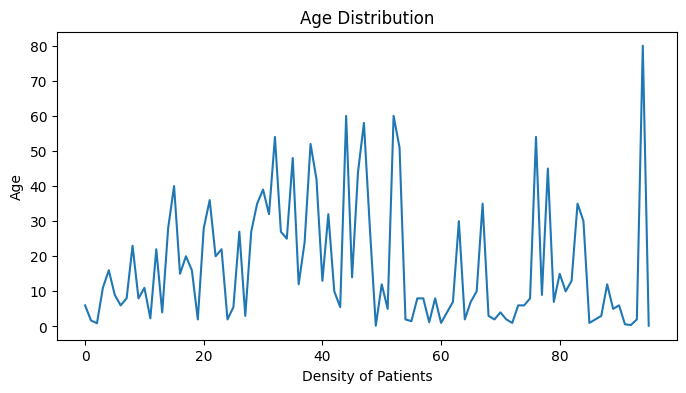

In [ ]:

# Assuming your DataFrame is named 'df'
df['age'].plot(kind='line', figsize=(8, 4))

# Add title and labels
plt.title('Age Distribution')
plt.ylabel('Age')
plt.xlabel('Density of Patients')

# Show the plot
plt.show()

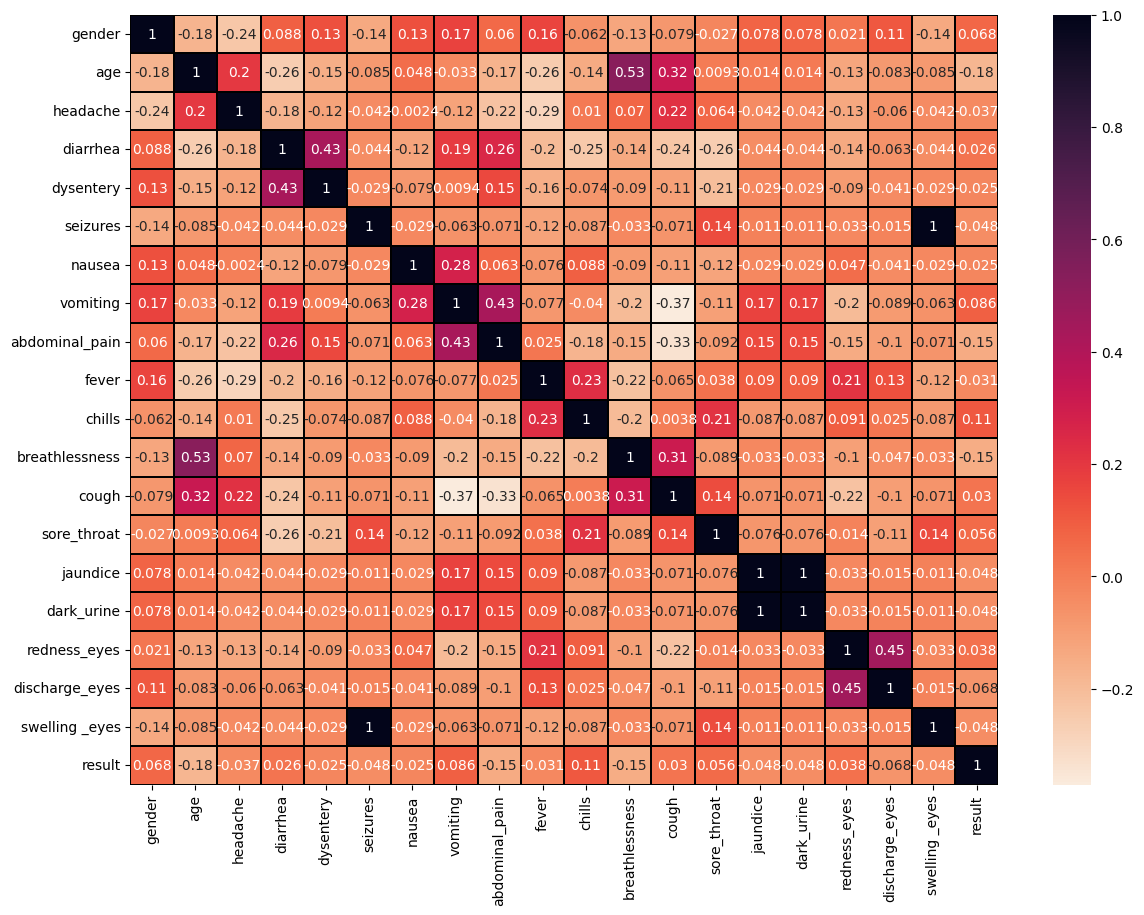

In [ ]:
plt.figure(figsize=(14,10))
plot=sns.heatmap(corr_mat_inf,annot=True,linewidths=0.01, linecolor='black',cmap='rocket_r')
plt.show()

Text(0.5, 0, 'Breathlessness & Positive Patient')

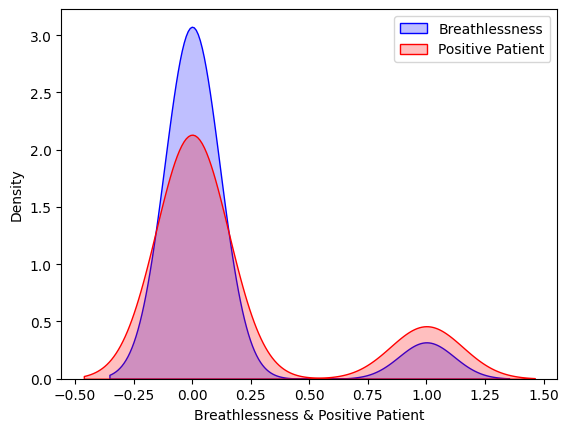

In [ ]:
ax = sns.kdeplot(df.breathlessness,color="Blue", fill = True)
ax = sns.kdeplot(df.result,ax =ax,color="Red", fill= True)
ax.legend(["Breathlessness","Positive Patient"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Breathlessness & Positive Patient')

Text(0.5, 1.0, 'Sore Throat & Positive Patient')

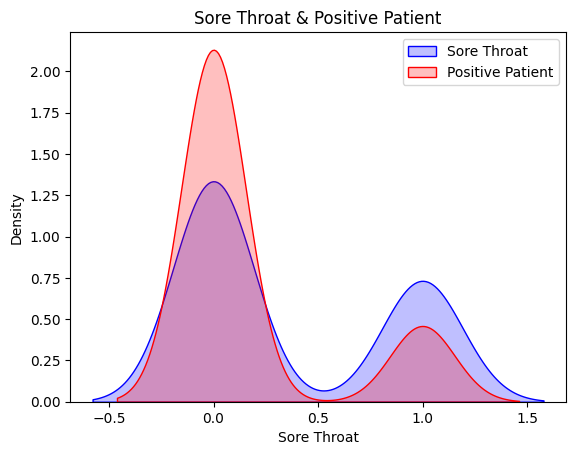

In [ ]:
ax = sns.kdeplot(df.sore_throat,color="Blue", fill = True)
ax = sns.kdeplot(df.result,ax =ax,color="Red", fill= True)
ax.legend(["Sore Throat","Positive Patient"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Sore Throat')
ax.set_title('Sore Throat & Positive Patient')

Text(0.5, 1.0, 'Fever & Positive Patient')

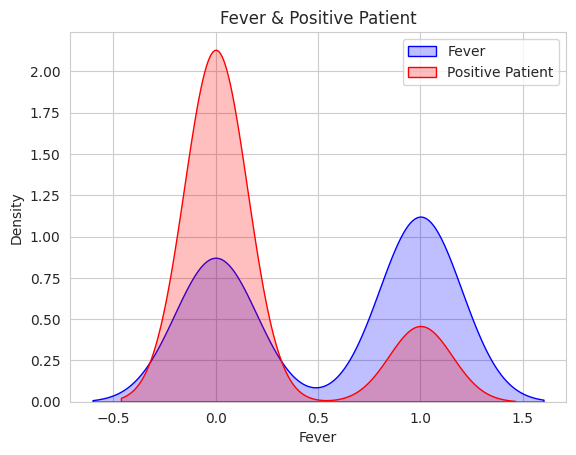

In [ ]:
ax = sns.kdeplot(df.fever,color="Blue", fill = True)
ax = sns.kdeplot(df.result,ax =ax,color="Red", fill= True)
ax.legend(["Fever","Positive Patient"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Fever')
ax.set_title('Fever & Positive Patient')

Text(0.5, 1.0, 'Cough & Positive Patient')

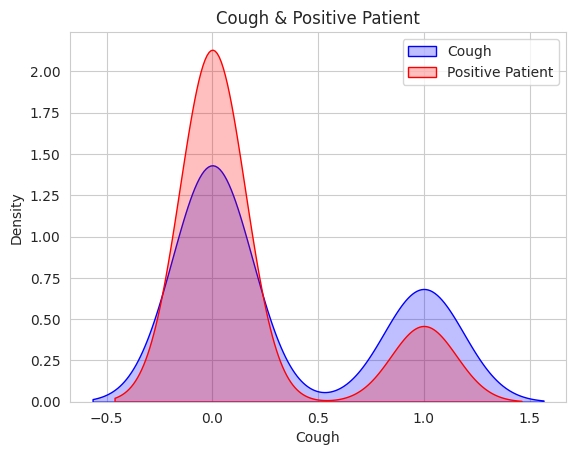

In [ ]:
ax = sns.kdeplot(df.cough,color="Blue", fill = True)
ax = sns.kdeplot(df.result,ax =ax,color="Red", fill= True)
ax.legend(["Cough","Positive Patient"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Cough')
ax.set_title('Cough & Positive Patient')

<ipython-input-137-268350407ee2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="result",data=df,palette='bwr')


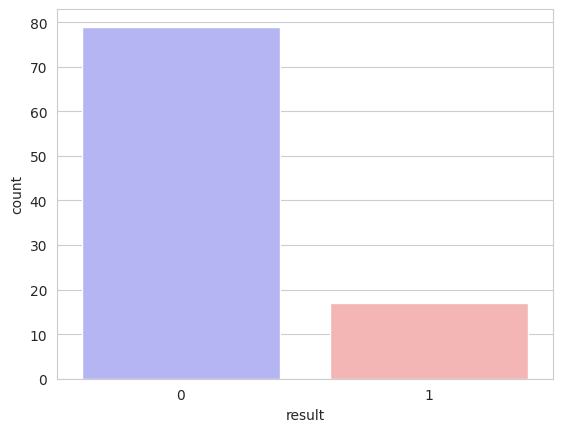

In [ ]:
sns.countplot(x="result",data=df,palette='bwr')
plt.show()

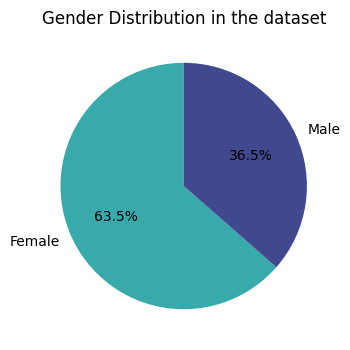

In [ ]:

counts = df['gender'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(counts, labels = ['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("mako_r", 2))
plt.title('Gender Distribution in the dataset')
plt.show()

In [ ]:
df.groupby('result').mean()

,gender,age,headache,diarrhea,dysentery,seizures,nausea,vomiting,abdominal_pain,fever,chills,breathlessness,cough,sore_throat,jaundice,dark_urine,redness_eyes,discharge_eyes,swelling _eyes
result,,,,,,,,,,,,,,,,,,,
0,0.620253,19.084810,0.151899,0.151899,0.075949,0.012658,0.075949,0.253165,0.354430,0.569620,0.392405,0.113924,0.316456,0.341772,0.012658,0.012658,0.088608,0.025316,0.012658
1,0.705882,10.723529,0.117647,0.176471,0.058824,0.000000,0.058824,0.352941,0.176471,0.529412,0.529412,0.000000,0.352941,0.411765,0.000000,0.000000,0.117647,0.000000,0.000000


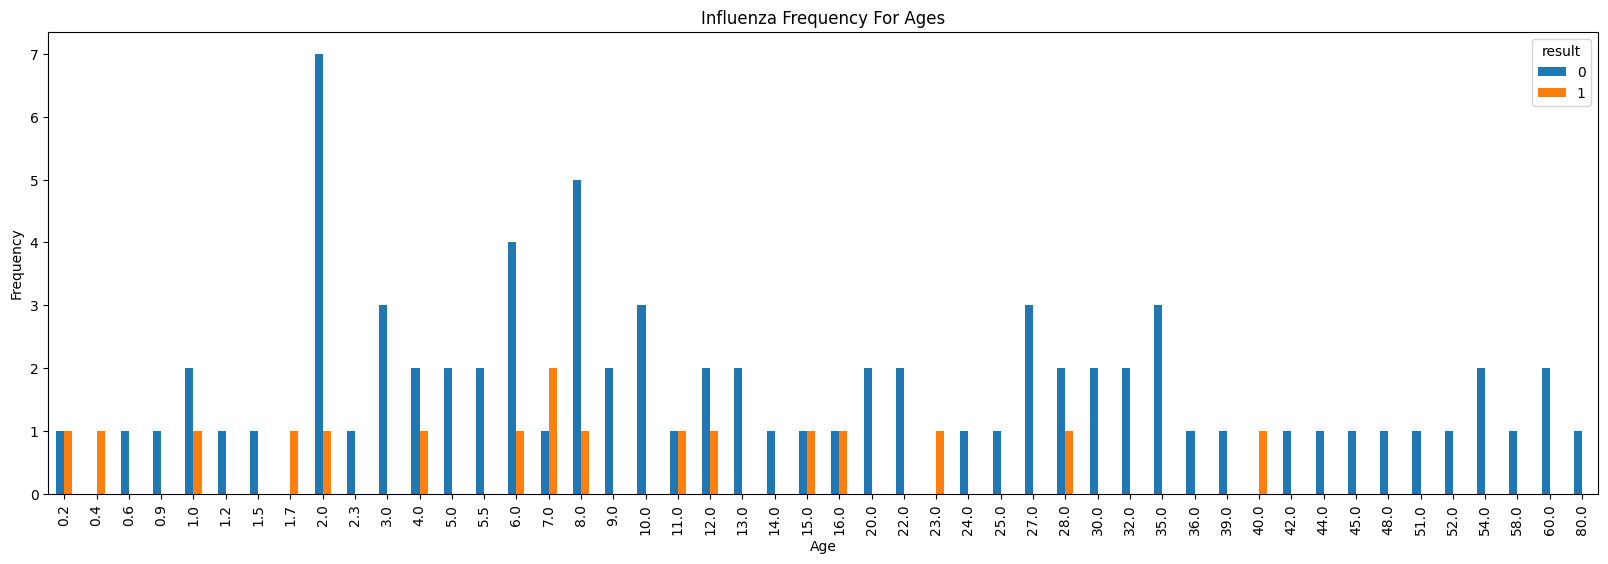

In [ ]:
pd.crosstab(df.age,df.result).plot(kind="bar",figsize=(20,6))
plt.title("Influenza Frequency For Ages")
plt.xlabel('Age')
plt.ylabel('Frequency')
#plt.savefig('influenza_age.png')
plt.show()

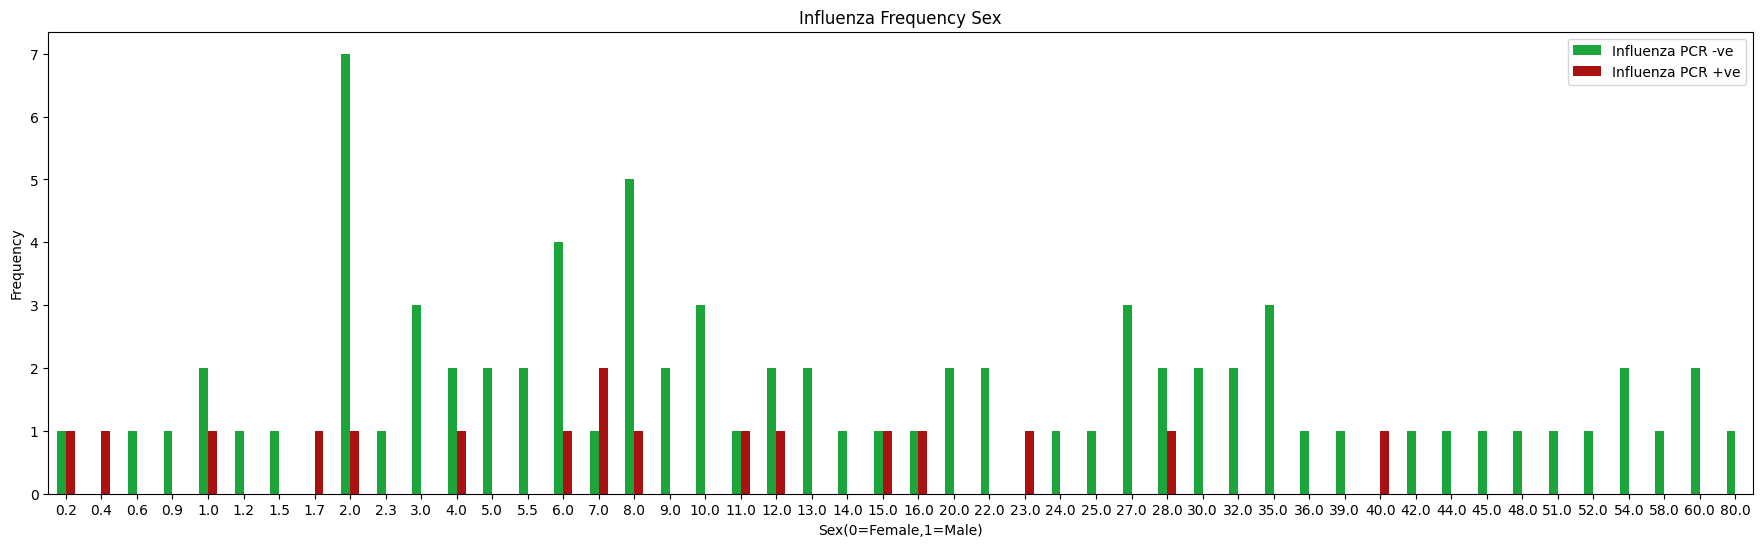

In [ ]:
pd.crosstab(df.age,df.result).plot(kind="bar",figsize=(22,6),color=['#1CA53B','#AA1111'])
plt.title("Influenza Frequency Sex")
plt.xlabel('Sex(0=Female,1=Male)')
plt.xticks(rotation=0)
plt.legend(["Influenza PCR -ve","Influenza PCR +ve"])
plt.ylabel('Frequency')
#plt.savefig('influenza_sex.png')
plt.show()

# **ML Models**

In [ ]:
y=df.result.values
x_data=df.drop(['result'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
accuracies={}

 **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(x_train, y_train)
acc = regr.score(x_test,y_test)*100
accuracies['Logistic Regression']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.21%


In [ ]:
y_pred = regr.predict(x_test)

In [ ]:
regr.intercept_

array([0.02040608])

In [ ]:
regr.coef_

array([[ 0.17330325, -0.06901054, -0.60920536,  0.15693955, -0.22277956,
        -0.30267839,  0.3067441 ,  0.35241152, -1.4051573 , -0.60029268,
         0.26127691, -0.22937155,  0.40390606, -0.04104276, -0.05028094,
        -0.05028094,  0.38389905, -0.32002325, -0.30267839]])

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
acc = classifier.score(x_test,y_test)*100
accuracies['Decision Tree']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 62.07%


Sorted feature importances:
age: 0.381
abdominal_pain: 0.104
fever: 0.095
diarrhea: 0.083
sore_throat: 0.076
cough: 0.073
gender: 0.071
nausea: 0.051
vomiting: 0.041
redness_eyes: 0.025
swelling _eyes: 0.000
seizures: 0.000
jaundice: 0.000
headache: 0.000
dysentery: 0.000
discharge_eyes: 0.000
dark_urine: 0.000
chills: 0.000
breathlessness: 0.000


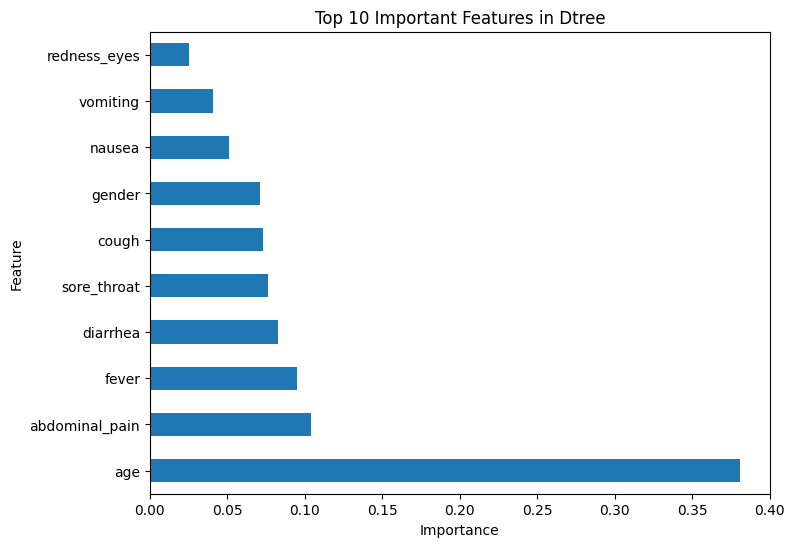

In [ ]:
importances = classifier.feature_importances_
# Sort features by importance
column_names=['gender','age','headache','diarrhea','dysentery','seizures','nausea','vomiting','abdominal_pain','fever','chills','breathlessness','cough','sore_throat','jaundice','dark_urine','redness_eyes','discharge_eyes','swelling _eyes']
sorted_importances = sorted(zip(importances, column_names), reverse=True)
print("Sorted feature importances:")
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.3f}")

# Create a pandas Series with the importances and column names
weights = pd.Series(importances, index=column_names)

# Plot the top 10 important features
plt.figure(figsize=(8, 6))
weights.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Important Features in Dtree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier1=RandomForestClassifier(n_estimators=1000,oob_score=True,n_jobs=-1,
                               random_state=50,criterion='entropy',
                               max_leaf_nodes=30)
classifier1.fit(x_train,y_train)
#Predicting the Test ser results
y_pred=classifier1.predict(x_test)
acc = classifier1.score(x_test,y_test)*100
accuracies['Random Forest']=acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 79.31%


Sorted feature importances:
age: 0.353
abdominal_pain: 0.098
fever: 0.083
sore_throat: 0.073
chills: 0.064
cough: 0.051
gender: 0.049
vomiting: 0.049
diarrhea: 0.038
redness_eyes: 0.034
headache: 0.032
breathlessness: 0.024
nausea: 0.019
dysentery: 0.016
discharge_eyes: 0.006
swelling _eyes: 0.005
seizures: 0.004
dark_urine: 0.002
jaundice: 0.001


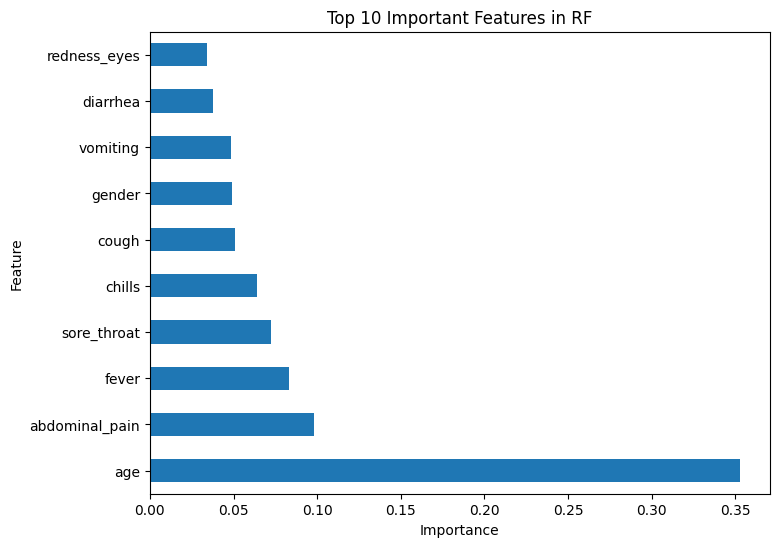

In [ ]:
importances = classifier1.feature_importances_
column_names=['gender','age','headache','diarrhea','dysentery','seizures','nausea','vomiting','abdominal_pain','fever','chills','breathlessness','cough','sore_throat','jaundice','dark_urine','redness_eyes','discharge_eyes','swelling _eyes']
# Sort features by importance
sorted_importances = sorted(zip(importances, column_names), reverse=True)
print("Sorted feature importances:")
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.3f}")


# Create a pandas Series with the importances and column names
weights = pd.Series(importances, index=column_names)

# Plot the top 10 important features
plt.figure(figsize=(8, 6))
weights.sort_values(ascending=False)[:10].plot(kind='barh')
plt.title("Top 10 Important Features in RF")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Support vector machine**

In [ ]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
acc=svm.score(x_test,y_test)*100
accuracies['SVM']=acc
print("Test Accuracy of SVM Algorithm {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm 93.10%


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # you can adjust the number of neighbors
knn.fit(x_train, y_train)
acc = knn.score(x_test, y_test) * 100
accuracies['KNN'] = acc
print("Test Accuracy of KNN Algorithm {:.2f}%".format(acc))

Test Accuracy of KNN Algorithm 75.86%


**Bar Plot for the accuracies**

<ipython-input-26-de1cb5c7f3a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colors)
<ipython-input-26-de1cb5c7f3a6>:7: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colors)


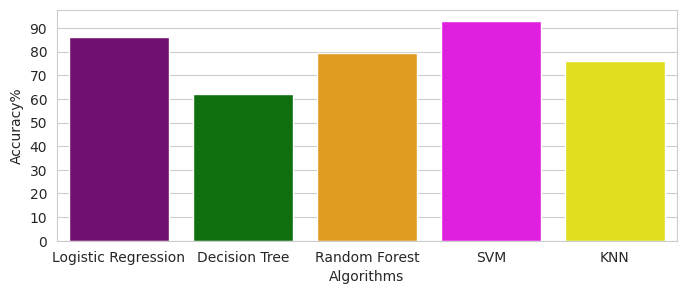

In [ ]:
colors=["purple","green","orange","magenta","yellow",'blue']
sns.set_style("whitegrid")
plt.figure(figsize=(8,3))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy%")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colors)
plt.show()

In [ ]:
#Predicted values
pred_lr =regr.predict(x_test)
pred_dtc=classifier.predict(x_test)
pred_rf=classifier1.predict(x_test)
pred_svm=svm.predict(x_test)
pred_knn=knn.predict(x_test)

In [ ]:
print("Classification Report of Logistic Regression:\n", classification_report(y_test, pred_lr))
print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n")
print("Classification Report of Decision Tree:\n", classification_report(y_test, pred_dtc))
print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n")
print("Classification Report of Random Forest:\n", classification_report(y_test, pred_rf))
print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n")
print("Classification Report of Support Vector Machine:\n", classification_report(y_test, pred_svm))
print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n")
print("Classification Report of K-Nearest Neighbour:\n", classification_report(y_test,pred_knn))
print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * \n")

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        27
           1       0.00      0.00      0.00         2

    accuracy                           0.86        29
   macro avg       0.46      0.46      0.46        29
weighted avg       0.86      0.86      0.86        29

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

Classification Report of Decision Tree:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77        27
           1       0.00      0.00      0.00         2

    accuracy                           0.62        29
   macro avg       0.45      0.33      0.38        29
weighted avg       0.84      0.62      0.71        29

* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

Classification Report of Random Forest:
               precision    recall  f1-score   support

           0       0.96      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm_lr=confusion_matrix(y_test,pred_lr)
cm_dtc=confusion_matrix(y_test,pred_dtc)
cm_rf=confusion_matrix(y_test,pred_rf)
cm_svm=confusion_matrix(y_test,pred_svm)
cm_knn=confusion_matrix(y_test,pred_knn)

<Axes: title={'center': 'KNN'}>

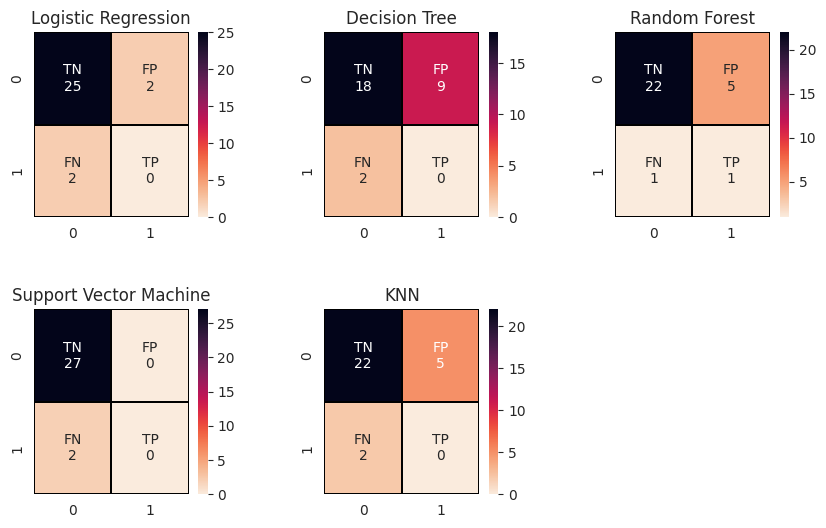

In [ ]:
plt.figure(figsize=(10,6))

plt.subplots_adjust(wspace=0.5,hspace=0.5)



plt.subplot(2,3,1)
plt.title("Logistic Regression")
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_lr.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_lr, annot=labels, fmt='', cmap='rocket_r',linewidths=0.2, linecolor='black')





plt.subplot(2,3,2)
plt.title("Decision Tree")
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_dtc.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_dtc, annot=labels, fmt='', cmap='rocket_r',linewidths=0.2, linecolor='black')




plt.subplot(2,3,3)
plt.title("Random Forest")
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_rf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_rf, annot=labels, fmt='', cmap='rocket_r',linewidths=0.2, linecolor='black')



plt.subplot(2,3,4)
plt.title("Support Vector Machine")
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_svm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_svm, annot=labels, fmt='', cmap='rocket_r',linewidths=0.2, linecolor='black')

plt.subplot(2,3,5)
plt.title("KNN")
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='rocket_r',linewidths=0.2, linecolor='black')

# **Ensemble Techniques**

**ADAboost Algo**

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
#n_estimator =50(Default_value)
#base_estimator=DecisionTreeClassifier(default value)
model.fit(x_train,y_train)
preds=model.predict(x_test)
print("ADABoost Accuracy Score:", metrics.accuracy_score(y_test, preds))

ADABoost Accuracy Score: 0.7241379310344828


In [ ]:
print("Classification Report")
print(classification_report(y_test,preds))


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.09      0.50      0.15         2

    accuracy                           0.62        29
   macro avg       0.52      0.56      0.45        29
weighted avg       0.89      0.62      0.71        29



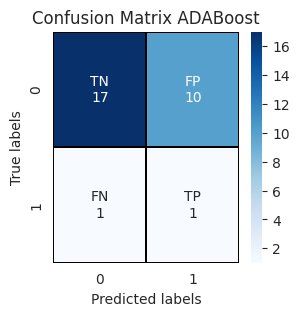

In [ ]:
# Create a seaborn heatmap
cm = confusion_matrix(y_test,preds)

plt.figure(figsize=(3,3))
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels,fmt='', cmap='Blues', linewidths=0.2, linecolor='black')


# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix ADABoost')
plt.show()

**GradientBoost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05,0.025, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=learning_rate, max_features=3, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_test, y_test)))
    print("\n")

Learning rate:  0.05
Accuracy score (training): 0.896
Accuracy score (validation): 0.759


Learning rate:  0.025
Accuracy score (training): 0.851
Accuracy score (validation): 0.793


Learning rate:  0.075
Accuracy score (training): 0.940
Accuracy score (validation): 0.759


Learning rate:  0.1
Accuracy score (training): 0.955
Accuracy score (validation): 0.759


Learning rate:  0.25
Accuracy score (training): 0.985
Accuracy score (validation): 0.690


Learning rate:  0.5
Accuracy score (training): 0.985
Accuracy score (validation): 0.655


Learning rate:  0.75
Accuracy score (training): 0.985
Accuracy score (validation): 0.690


Learning rate:  1
Accuracy score (training): 0.985
Accuracy score (validation): 0.690




In [ ]:
gb_clf2=gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.25, max_features=1, max_depth=2, random_state=40)
gb_clf.fit(x_train, y_train)
predictions=gb_clf2.predict(x_test)


print("Classification Report")
print(classification_report(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.74      0.83        27
           1       0.12      0.50      0.20         2

    accuracy                           0.72        29
   macro avg       0.54      0.62      0.52        29
weighted avg       0.90      0.72      0.79        29



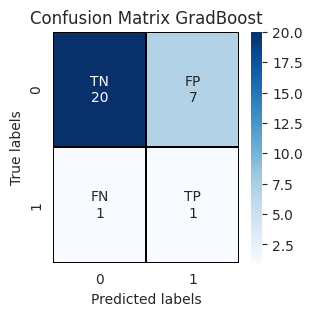

In [ ]:

# Create a seaborn heatmap
cm=(confusion_matrix(y_test,predictions))

plt.figure(figsize=(3,3))
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels,fmt='', cmap='Blues', linewidths=0.2, linecolor='black')


# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix GradBoost')
plt.show()

**XG boost**

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train,y_train)
preds=model.predict(x_test)
print("XGBoost Accuracy Score:", metrics.accuracy_score(y_test, preds))

XGBoost Accuracy Score: 0.6206896551724138


In [ ]:
print("Classification Report")
print(classification_report(y_test,preds))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.63      0.76        27
           1       0.09      0.50      0.15         2

    accuracy                           0.62        29
   macro avg       0.52      0.56      0.45        29
weighted avg       0.89      0.62      0.71        29



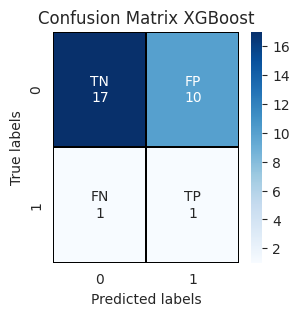

In [ ]:
cm = (confusion_matrix(y_test,preds))

plt.figure(figsize=(3,3))
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels,fmt='', cmap='Blues', linewidths=0.2, linecolor='black')


# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix XGBoost')
plt.show()

# **Neural net**

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)

x_train shape: (67, 19)
y_train shape: (67,)
x_test shape: (29, 19)
y_test shape: (29,)


In [ ]:

from keras.layers import InputLayer


from keras.regularizers import L2
# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(19,), kernel_regularizer=L2(0.01), bias_regularizer=L2(0.01)))
model.add(Dense(64, activation='tanh', kernel_regularizer=L2(0.01), bias_regularizer=L2(0.01)))
model.add(Dense(1, activation='sigmoid'))


# Create a TensorBoard callback

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy','AUC'])

# Train the model
model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test),callbacks=callbacks)

Epoch 1/15
3/3 [==============================] - 2s 215ms/step - loss: 1.8100 - accuracy: 0.7015 - auc: 0.4551 - val_loss: 1.4992 - val_accuracy: 0.9310 - val_auc: 0.3333
Epoch 2/15
3/3 [==============================] - 0s 53ms/step - loss: 1.6606 - accuracy: 0.7761 - auc: 0.6135 - val_loss: 1.4195 - val_accuracy: 0.9310 - val_auc: 0.3148
Epoch 3/15
3/3 [==============================] - 0s 48ms/step - loss: 1.6576 - accuracy: 0.7761 - auc: 0.6141 - val_loss: 1.3789 - val_accuracy: 0.9310 - val_auc: 0.2963
Epoch 4/15
3/3 [==============================] - 0s 42ms/step - loss: 1.6252 - accuracy: 0.7761 - auc: 0.6365 - val_loss: 1.3352 - val_accuracy: 0.9310 - val_auc: 0.3056
Epoch 5/15
3/3 [==============================] - 0s 43ms/step - loss: 1.5591 - accuracy: 0.7761 - auc: 0.6660 - val_loss: 1.3092 - val_accuracy: 0.9310 - val_auc: 0.3333
Epoch 6/15
3/3 [==============================] - 0s 41ms/step - loss: 1.5099 - accuracy: 0.7761 - auc: 0.6269 - val_loss: 1.3186 - val_accuracy

In [ ]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test),
                    verbose=0)


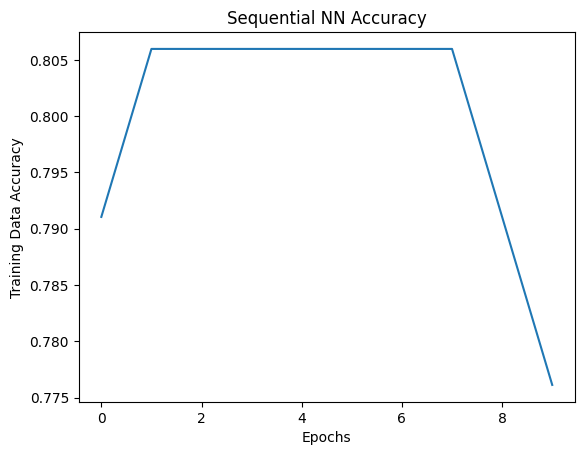

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Sequential NN Accuracy')
plt.ylabel('Training Data Accuracy')
plt.xlabel('Epochs')
plt.show()

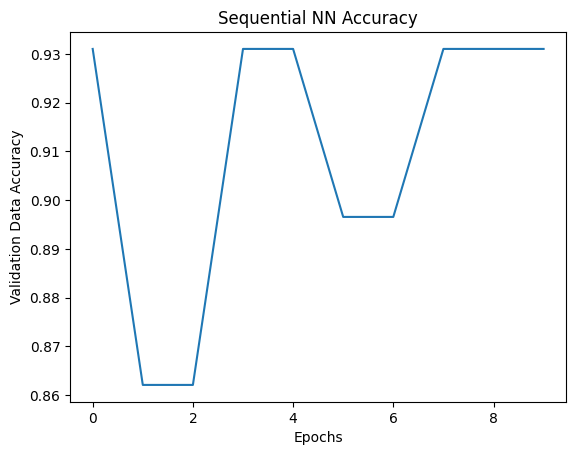

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('Sequential NN Accuracy')
plt.ylabel('Validation Data Accuracy')
plt.xlabel('Epochs')
plt.show()

Text(0.5, 1.0, 'AUC of Sequential NN Model')

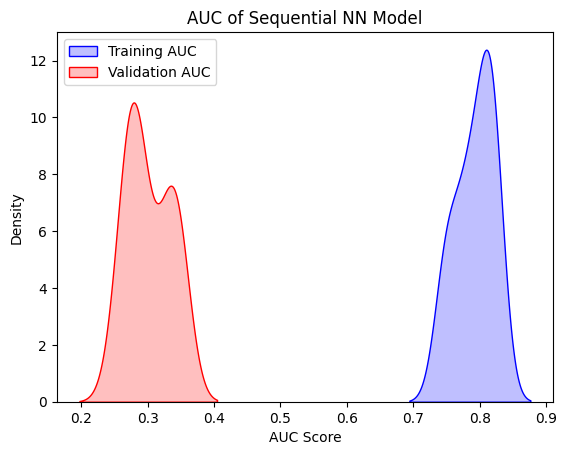

In [ ]:
ax = sns.kdeplot(history.history['auc'], label='Train AUC',color="Blue", fill = True)
ax = sns.kdeplot(history.history['val_auc'], label='Val AUC',ax =ax,color="Red", fill= True)
ax.legend(["Training AUC","Validation AUC"],loc='upper left')
ax.set_ylabel('Density')
ax.set_xlabel('AUC Score')
ax.set_title('AUC of Sequential NN Model')

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2560      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10881 (42.50 KB)
Trainable params: 10881 (42.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel= converter.convert()
open('influenza.tflite','wb').write(tfmodel)

45776

Plot from Tf

In [ ]:
from tensorflow.keras.utils import plot_model

visualize with nodes

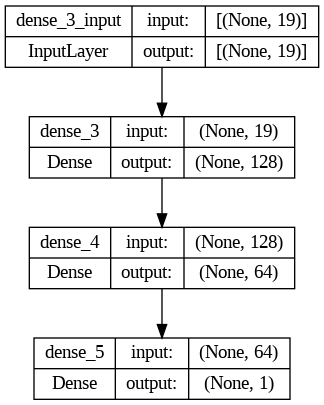

In [ ]:
plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
%matplotlib inline


In [ ]:
!pip install neuralplot
from neuralplot import ModelPlot

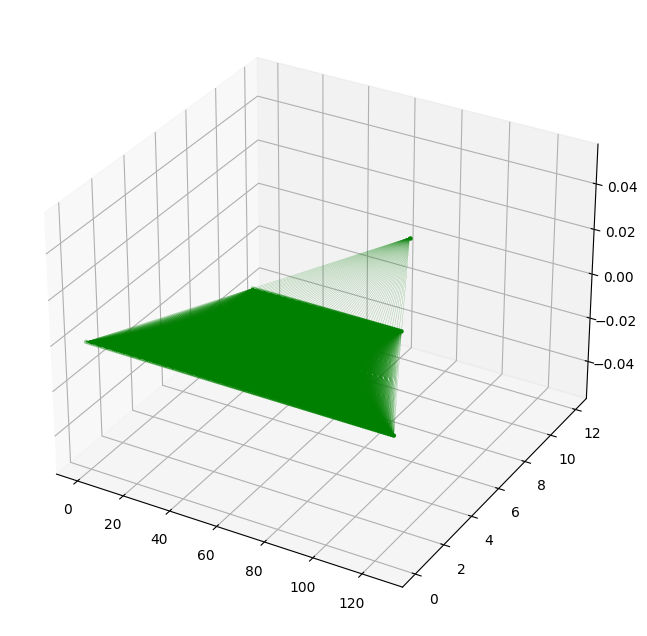

In [ ]:
modelplot = ModelPlot(model=model, grid=True, connection=True, linewidth=0.1)
modelplot.show()

In [ ]:
fb_model="/content/influenza.tflite"
tf.lite.experimental.Analyzer.analyze(model_content=fb_model)

=== TFLite ModelAnalyzer ===

Model provided has model identifier 'tent', should be 'TFL3'
Failed to mmap the given model buffer.


In [ ]:
interpreter= tf.lite.Interpreter(model_path=fb_model)


In [ ]:
input_details= interpreter.get_input_details()
output_details= interpreter.get_output_details()

In [ ]:
print("Input Shape",input_details[0]['shape'])
print("Input Type",input_details[0]['dtype'])
print("Output Shape",output_details[0]['shape'])
print("Output Type",output_details[0]['dtype'])

Input Shape [ 1 19]
Input Type <class 'numpy.float32'>
Output Shape [1 1]
Output Type <class 'numpy.float32'>


In [ ]:
interpreter = tf.lite.Interpreter(model_path=fb_model)
interpreter.allocate_tensors()

In [ ]:
input_data = np.array([[0,35,0,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1]],dtype=np.float32)  # Example input data, adjust as per your model

#gender	age	headache	diarrhea	dysentery	seizures	nausea	vomiting	abdominal_pain
# fever chills breathlessness cough sore_throat jaundice dark_urine redness_eyes
# discharge_eyes swelling _eyes


# Set input tensor
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run inference
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print the output (adjust as per your model's output)
print('Output:', output_data)

Output: [[0.07112955]]
